In [361]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
from pathlib import Path
import json

basepath = Path('/Users/aryamangupta/CricML/Match_Prediction/')
data_folder_path = basepath / 'data' / 'ipl_json'


    
                


        

In [188]:
stadium_to_city = {
    # Delhi
    'Arun Jaitley Stadium': 'Delhi_A',
    'Arun Jaitley Stadium, Delhi': 'Delhi_A',
    'Feroz Shah Kotla': 'Delhi_A',  # This is the old name of Arun Jaitley Stadium
    
    # Mumbai (3 different stadiums)
    'Brabourne Stadium': 'Mumbai_A',
    'Brabourne Stadium, Mumbai': 'Mumbai_A',
    'Dr DY Patil Sports Academy': 'Mumbai_B',
    'Dr DY Patil Sports Academy, Mumbai': 'Mumbai_B',
    'Wankhede Stadium': 'Mumbai_C',
    'Wankhede Stadium, Mumbai': 'Mumbai_C',
    
    # Pune (2 different stadiums)
    'Maharashtra Cricket Association Stadium': 'Pune_A',
    'Maharashtra Cricket Association Stadium, Pune': 'Pune_A',
    'Subrata Roy Sahara Stadium': 'Pune_A',  # Old name of MCA Stadium
    'Nehru Stadium': 'Pune_B',
    
    # Mohali/Chandigarh area (2 different stadiums)
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Mohali_B',
    'Punjab Cricket Association IS Bindra Stadium': 'Mohali_A',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Mohali_A',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Mohali_A',
    'Punjab Cricket Association Stadium, Mohali': 'Mohali_A',
    
    # Abu Dhabi (same stadium, different names)
    'Sheikh Zayed Stadium': 'Abu_Dhabi_A',
    'Zayed Cricket Stadium, Abu Dhabi': 'Abu_Dhabi_A',
    
    # Other Indian Cities (single stadium each)
    'Barabati Stadium': 'Cuttack',
    'Barsapara Cricket Stadium, Guwahati': 'Guwahati',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 'Lucknow',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Visakhapatnam',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Visakhapatnam',
    'Eden Gardens': 'Kolkata',
    'Eden Gardens, Kolkata': 'Kolkata',
    'Green Park': 'Kanpur',
    'Himachal Pradesh Cricket Association Stadium': 'Dharamsala',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Dharamsala',
    'Holkar Cricket Stadium': 'Indore',
    'JSCA International Stadium Complex': 'Ranchi',
    'M Chinnaswamy Stadium': 'Bengaluru',
    'M Chinnaswamy Stadium, Bengaluru': 'Bengaluru',
    'M.Chinnaswamy Stadium': 'Bengaluru',
    'MA Chidambaram Stadium': 'Chennai',
    'MA Chidambaram Stadium, Chepauk': 'Chennai',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'Chennai',
    'Narendra Modi Stadium, Ahmedabad': 'Ahmedabad',
    'Sardar Patel Stadium, Motera': 'Ahmedabad',  # Old name of Narendra Modi Stadium
    'Rajiv Gandhi International Stadium': 'Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal': 'Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Hyderabad',
    'Saurashtra Cricket Association Stadium': 'Rajkot',
    'Sawai Mansingh Stadium': 'Jaipur',
    'Sawai Mansingh Stadium, Jaipur': 'Jaipur',
    'Shaheed Veer Narayan Singh International Stadium': 'Raipur',
    'Vidarbha Cricket Association Stadium, Jamtha': 'Nagpur',
    
    # UAE Stadiums (other)
    'Dubai International Cricket Stadium': 'Dubai',
    'Sharjah Cricket Stadium': 'Sharjah',
    
    # South African Stadiums
    'Buffalo Park': 'East_London',
    'De Beers Diamond Oval': 'Kimberley',
    'Kingsmead': 'Durban',
    'New Wanderers Stadium': 'Johannesburg',
    'Newlands': 'Cape_Town',
    'OUTsurance Oval': 'Bloemfontein',
    "St George's Park": 'Port_Elizabeth',
    'SuperSport Park': 'Centurion'
}

In [383]:
dataset = []


for json_path in sorted(data_folder_path.glob('*.json')):
    with json_path.open() as f:
        json_data = f.read()
        match_data = json.loads(json_data)
        # print (data['info'])
        year = match_data["info"]["dates"][0].split('-')[0]
        # print(year)
        stadium = stadium_to_city[match_data["info"]["venue"]]

        for inning in match_data['innings']:
            inning_dataset = []
            team_runs = 0
            for over in inning['overs']:
                for delivery in over['deliveries']:
                    delivery_data = []
                    #Delivery outcome
                    if 'wickets' in delivery:
                        delivery_data.append('W')
                    else:
                        #Added cases to remove uncommon classes from the dataset, can be added back later
                        if delivery['runs']['total'] == 3:
                            delivery_data.append('2')
                        elif delivery['runs']['total'] == 5:
                            delivery_data.append('4')
                        elif delivery['runs']['total'] == 7:
                            delivery_data.append('6')
                        else:
                            delivery_data.append(str(delivery['runs']['total']))

                    delivery_data.append(stadium)

                    batter = delivery["batter"]
                    batter_id = match_data["info"]["registry"]["people"][batter]
                    delivery_data.append(batter_id)

                    bowler = delivery["bowler"]
                    bowler_id = match_data["info"]["registry"]["people"][bowler]
                    delivery_data.append(bowler_id)

                    non_striker = delivery["non_striker"]
                    non_striker_id = match_data["info"]["registry"]["people"][non_striker]
                    delivery_data.append(non_striker_id)

                    team_runs += delivery['runs']['total']
                    delivery_data.append(team_runs)
                    
                    inning_dataset.append(delivery_data)
                    
            dataset.append((inning_dataset,year))

In [384]:
print(len(dataset))
print((dataset[0][0]))

2217
[['0', 'Hyderabad', 'dcce6f09', '245c97cb', '0a476045', 0], ['0', 'Hyderabad', 'dcce6f09', '245c97cb', '0a476045', 0], ['4', 'Hyderabad', 'dcce6f09', '245c97cb', '0a476045', 4], ['0', 'Hyderabad', 'dcce6f09', '245c97cb', '0a476045', 4], ['2', 'Hyderabad', 'dcce6f09', '245c97cb', '0a476045', 6], ['0', 'Hyderabad', '0a476045', '245c97cb', 'dcce6f09', 6], ['1', 'Hyderabad', '0a476045', '245c97cb', 'dcce6f09', 7], ['1', 'Hyderabad', '0a476045', '18e6906e', 'dcce6f09', 8], ['4', 'Hyderabad', 'dcce6f09', '18e6906e', '0a476045', 12], ['1', 'Hyderabad', 'dcce6f09', '18e6906e', '0a476045', 13], ['6', 'Hyderabad', 'dcce6f09', '18e6906e', '0a476045', 19], ['W', 'Hyderabad', 'dcce6f09', '18e6906e', '0a476045', 19], ['0', 'Hyderabad', '32198ae0', '18e6906e', '0a476045', 19], ['4', 'Hyderabad', '32198ae0', '18e6906e', '0a476045', 23], ['1', 'Hyderabad', '0a476045', '245c97cb', '32198ae0', 24], ['0', 'Hyderabad', '32198ae0', '245c97cb', '0a476045', 24], ['0', 'Hyderabad', '32198ae0', '245c97cb',

In [292]:
# print(dataset[0][11])
all_runs = [balls[0] for inning,year in dataset for balls in inning]
runs = sorted(list(set(all_runs)))
print(runs)
stoi = {s:i+1 for i,s in enumerate(runs)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

n_outcomes = len(runs)+1
print(n_outcomes)


['0', '1', '2', '4', '6', 'W']
{1: '0', 2: '1', 3: '2', 4: '4', 5: '6', 6: 'W', 0: '.'}
7


In [293]:
# Count frequencies using a Counter
from collections import Counter
outcome_counts = Counter(all_runs)

# Print frequencies in a readable format
print("\nOutcome frequencies:")
for outcome in sorted(outcome_counts.keys()):
    print(f"{outcome}: {outcome_counts[outcome]}")

# You can also get total count to verify
total_balls = sum(outcome_counts.values())
print(f"\nTotal number of balls: {total_balls}")

n_outcomes = len(runs)+1
print(f"\nNumber of unique outcomes: {n_outcomes}")


Outcome frequencies:
0: 77945
1: 108006
2: 18225
4: 30744
6: 13050
W: 12950

Total number of balls: 260920

Number of unique outcomes: 7


In [294]:
#stadium embeddings
# TO DO:add one stadium type for unrecognised stadium
all_stadiums = [balls[1] for inning,year in dataset for balls in inning]
stadiums = sorted(list(set(all_stadiums)))
print(stadiums)
stadiumtoi = {s:i for i,s in enumerate(stadiums)}
#stadiumtoi['.'] = 0
itostadium = {i:s for s,i in stadiumtoi.items()}
print(itostadium)

n_stadiums = len(stadiums)
print(n_stadiums)

['Abu_Dhabi_A', 'Ahmedabad', 'Bengaluru', 'Bloemfontein', 'Cape_Town', 'Centurion', 'Chennai', 'Cuttack', 'Delhi_A', 'Dharamsala', 'Dubai', 'Durban', 'East_London', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kolkata', 'Lucknow', 'Mohali_A', 'Mohali_B', 'Mumbai_A', 'Mumbai_B', 'Mumbai_C', 'Nagpur', 'Port_Elizabeth', 'Pune_A', 'Pune_B', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']
{0: 'Abu_Dhabi_A', 1: 'Ahmedabad', 2: 'Bengaluru', 3: 'Bloemfontein', 4: 'Cape_Town', 5: 'Centurion', 6: 'Chennai', 7: 'Cuttack', 8: 'Delhi_A', 9: 'Dharamsala', 10: 'Dubai', 11: 'Durban', 12: 'East_London', 13: 'Guwahati', 14: 'Hyderabad', 15: 'Indore', 16: 'Jaipur', 17: 'Johannesburg', 18: 'Kanpur', 19: 'Kimberley', 20: 'Kolkata', 21: 'Lucknow', 22: 'Mohali_A', 23: 'Mohali_B', 24: 'Mumbai_A', 25: 'Mumbai_B', 26: 'Mumbai_C', 27: 'Nagpur', 28: 'Port_Elizabeth', 29: 'Pune_A', 30: 'Pune_B', 31: 'Raipur', 32: 'Rajkot', 33: 'Ranchi', 34: 'Sharjah', 35: 'Visakhap

In [371]:
#batter embeddings
# TO DO:add one batter type for unrecognised batter
all_batters = [balls[2] for inning,year in dataset for balls in inning]
non_strikers = [balls[4] for inning,year in dataset for balls in inning]
batters = sorted(list(set(all_batters + non_strikers)))
print(batters)
battertoi = {s:i+1 for i,s in enumerate(batters)}
battertoi['.'] = 0
itobatter = {i:s for s,i in battertoi.items()}
print(itobatter)

n_batters = len(batters)
print(n_batters)

['00ea847a', '0184dc35', '025c4400', '0264c10e', '030f3089', '034b4b7d', '03806cf8', '03a83c50', '0404d43c', '0494fa6e', '04a418e8', '05c2ca46', '0604ef16', '063b3673', '0890552f', '0994d0ae', '0a3d54b9', '0a476045', '0a4ebc61', '0a509d6b', '0a67aec0', '0a8fce53', '0aadc906', '0b60eb09', '0bacade8', '0c2730df', '0c432afb', '0c94f480', '0c9652b0', '0d232ffd', '0dc00542', '0ebfb1ad', '0ed0cdbf', '0f12f9df', '0f721006', '0fa5042b', '10a91f35', '11614d87', '119678fd', '11df3dc8', '12314277', '12b610c2', '12eddf28', '1399b39c', '13c35c9e', '14b14cd8', '14f96089', '16043342', '1647bd37', '16dfcc19', '1763bc6c', '18c78b11', '18e6906e', '1a0c3177', '1a156c88', '1a2676c5', '1abb78f8', '1ac746c8', '1b7b0fa7', '1be70c88', '1c17e270', '1c2a64cd', '1c914163', '1da489ff', '1dc12ab9', '1e66c162', '1ee08e9a', '1efb8a28', '1fc6ef83', '2049f3a0', '20a941bb', '21d4e29b', '235c2bb6', '23ac69e6', '23cca426', '23eeb873', '244048f6', '245c97cb', '2461eef2', '2498e163', '249d60c9', '24d94623', '2503e881', '25

In [368]:
#bowler embeddings
# TO DO:add one bowler type for unrecognised bowler
all_bowlers = [balls[3] for inning,year in dataset for balls in inning]
bowlers = sorted(list(set(all_bowlers)))
print(bowlers)
bowlertoi = {s:i+1 for i,s in enumerate(bowlers)}
bowlertoi['.'] = 0
itobowler = {i:s for s,i in bowlertoi.items()}
print(itobowler)

n_bowlers = len(bowlers)
print(n_bowlers)

['012829ff', '0164b064', '025c4400', '0264c10e', '030f3089', '034b4b7d', '03806cf8', '03a83c50', '04a418e8', '05c2ca46', '0604ef16', '0994d0ae', '0a3d54b9', '0a476045', '0a4ebc61', '0a67aec0', '0a8fce53', '0af3426f', '0b60eb09', '0bf15e52', '0c2730df', '0c432afb', '0c9652b0', '0d232ffd', '0dc00542', '0f12f9df', '0f721006', '107c26fb', '10a91f35', '11614d87', '119678fd', '12314277', '12b610c2', '12eddf28', '13c35c9e', '14f96089', '1558d83b', '16043342', '1647bd37', '16605a1b', '16dfcc19', '18e6906e', '19b9f399', '1a0c3177', '1a156c88', '1a2676c5', '1abb78f8', '1ac746c8', '1b7b0fa7', '1be70c88', '1c2a64cd', '1c914163', '1cb14aa4', '1da489ff', '1dc12ab9', '1e66c162', '1ee08e9a', '2049f3a0', '20a941bb', '21ac077a', '21d4e29b', '23cca426', '23eeb873', '244048f6', '245c97cb', '2498e163', '249abedf', '249d60c9', '24d94623', '2503e881', '25eeb281', '260fd380', '266849c1', '26989d80', '26a85969', '26d041c4', '26e5cabf', '26ff4c29', '271f83cd', '27af6414', '27e71d47', '2815fe50', '287686fd', '29

In [369]:
years = [year for match,year in dataset for run in match]
year_count = {}
for yearn in years:
    if yearn not in year_count:
        year_count[yearn]=1
    else:
        year_count[yearn]+=1

total_deliveries = sum(year_count.values())
print(total_deliveries)
year_percentages = {year: (count/total_deliveries)*100 for year,count in year_count.items()}



260920


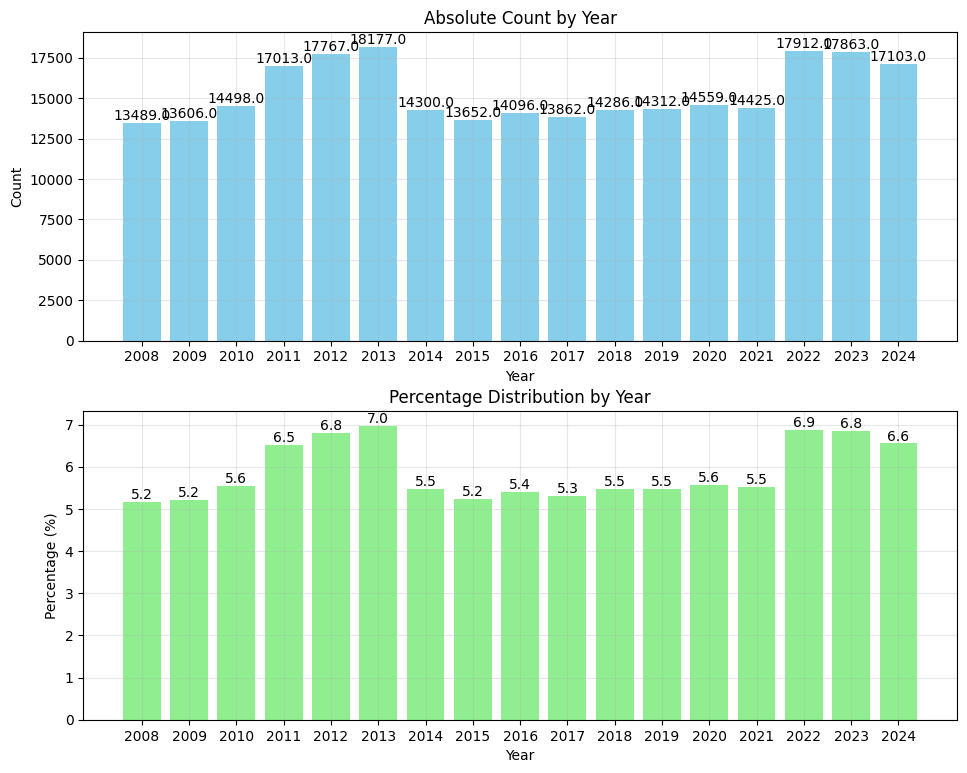

In [297]:
sorted_years = sorted(year_count.keys())
counts = [year_count[year] for year in sorted_years]
percentages = [year_percentages[year] for year in sorted_years]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.tight_layout(pad=3.0)

# Plot absolute counts
ax1.bar(sorted_years, counts, color='skyblue')
ax1.set_title('Absolute Count by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)

# Plot percentages
ax2.bar(sorted_years, percentages, color='lightgreen')
ax2.set_title('Percentage Distribution by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage (%)')
ax2.grid(True, alpha=0.3)

# Add value labels on top of each bar
for ax in [ax1, ax2]:
    for i, v in enumerate(counts if ax == ax1 else percentages):
        ax.text(sorted_years[i], v, f'{v:.1f}', 
                ha='center', va='bottom')

plt.show()

In [372]:
block_size = 6
def create_xy_pairs(data, block_size, stoi, stadiumtoi):
    X_outcome, X_stadium, X_batter, X_bowler, X_non_striker, Y = [], [], [], [], [], []  # separate lists for outcomes and stadiums
    for match in data:
        ix_stadium = stadiumtoi[match[0][0][1]]
        context_outcome = [0] * block_size
        context_stadium = [ix_stadium] * block_size  # add stadium context
        context_batter = [0]*block_size
        context_bowler = [0]*block_size
        context_non_striker = [0]*block_size
        for ball in match[0]:
            outcome = ball[0]
            stadium = ball[1]
            batter = ball[2]
            bowler = ball[3]
            non_striker = ball[4]
            
            ix = stoi[outcome]
            ix_stadium = stadiumtoi[stadium]
            ix_batter = battertoi[batter]
            ix_bowler = bowlertoi[bowler]
            ix_non_striker = battertoi[non_striker]

            X_outcome.append(context_outcome)
            X_stadium.append(context_stadium)  # append stadium context
            X_batter.append(context_batter)
            X_bowler.append(context_bowler)
            X_non_striker.append(context_non_striker)
            Y.append(ix)
            
            context_outcome = context_outcome[1:] + [ix]
            context_batter = context_batter[1:] + [ix_batter]
            context_bowler = context_bowler[1:] + [ix_bowler]
            context_non_striker = context_non_striker[1:] + [ix_non_striker]
            # context_stadium = context_stadium[1:] + [ix_stadium]  # update stadium context
            
    return torch.tensor(X_outcome), torch.tensor(X_stadium), torch.tensor(X_batter), torch.tensor(X_bowler), torch.tensor(X_non_striker), torch.tensor(Y)

# Split data based on years
train_data = [inning for inning in dataset if int(inning[1]) <= 2020]
val_data = [inning for inning in dataset if int(inning[1]) in [2021, 2022]]
test_data = [inning for inning in dataset if int(inning[1]) >= 2023]

# Create X,Y pairs for each split
X_train_outcome, X_train_stadium, X_train_batter, X_train_bowler, X_train_non_striker, y_train = create_xy_pairs(train_data, block_size, stoi, stadiumtoi)
X_val_outcome, X_val_stadium, X_val_batter, X_val_bowler, X_val_non_striker, y_val = create_xy_pairs(val_data, block_size, stoi, stadiumtoi)
X_test_outcome, X_test_stadium, X_test_batter, X_test_bowler, X_test_non_striker, y_test = create_xy_pairs(test_data, block_size, stoi, stadiumtoi)

In [373]:
X_train_stadium.shape, X_train_stadium.dtype, y_train.shape, y_train.dtype
# X_val.shape[0] + X_train.shape[0] + X_test.shape[0]

(torch.Size([193617, 6]), torch.int64, torch.Size([193617]), torch.int64)

In [374]:
n_embed_outcome = 2
n_embed_stadium = 2
n_embed_batter = 3
n_embed_bolwer = 3


In [375]:
g = torch.Generator().manual_seed(428)
C_outcome = torch.randn ((n_outcomes,n_embed_outcome), generator=g)
C_stadium = torch.randn ((n_stadiums,n_embed_stadium), generator=g)
C_batter = torch.randn ((n_batters,n_embed_batter), generator=g)
C_bowler = torch.randn((n_bowlers, n_embed_bolwer), generator=g)
W1 = torch.randn((block_size*(n_embed_outcome + n_embed_stadium + n_embed_batter + n_embed_bolwer + n_embed_batter),300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,n_outcomes),generator=g)*0.1
b2 = torch.randn(n_outcomes, generator=g)*0
parameters = [C_outcome, C_stadium, C_batter, W1, b1, W2, b2]

In [376]:
sum(p.nelement() for p in parameters)

27921

In [377]:
for p in parameters:
    p.requires_grad = True

In [304]:
lre = torch.linspace(-2,0,1000)
lrs = 10**lre

In [378]:
#Add learning rate decay

lri = []
lossi = []

for i in range (1000):

    #minibatch construction
    ix = torch.randint(0,X_train_outcome.shape[0],(32,))
    #forward pass
    emb_outcome = C_outcome[X_train_outcome[ix]]
    emb_stadium = C_stadium[X_train_stadium[ix]]
    emb_batter = C_batter[X_train_batter[ix]]
    emb_bowler = C_bowler[X_train_bowler[ix]]
    emb_non_striker = C_batter[X_train_non_striker[ix]]
    emb = torch.cat([emb_outcome, emb_stadium, emb_batter, emb_bowler, emb_non_striker], dim=-1) 
    h = torch.tanh(emb.view(-1,block_size*(n_embed_outcome + n_embed_stadium + n_embed_batter + n_embed_bolwer + n_embed_batter)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y_train[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    # lr = lrs[i]
    lr = 10**-1.5
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    # lri.append(lre[i])
    lossi.append(loss.log10().item())

(array([3921.,  199.,   96.,   92.,   65.,   39.,   48.,   39.,   41.,
          33.,   23.,   29.,   32.,   30.,   24.,   27.,   22.,   19.,
          22.,   21.,   20.,   25.,   24.,   26.,   24.,   25.,   25.,
          16.,   29.,   19.,   20.,   26.,   17.,   28.,   37.,   29.,
          24.,   29.,   26.,   29.,   25.,   48.,   35.,   39.,   48.,
          48.,   93.,  114.,  176., 3654.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

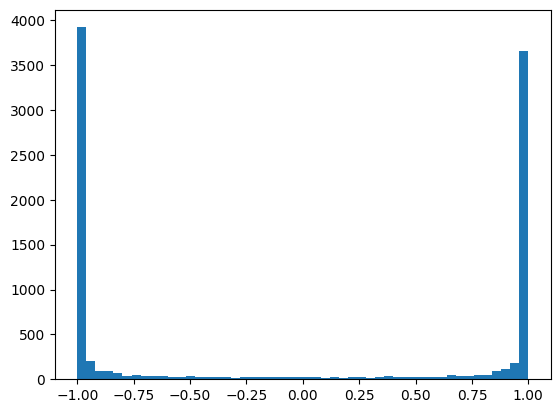

In [337]:
plt.hist(h.view(-1).tolist(),50)

In [387]:
with torch.no_grad():
    probs = torch.softmax(logits[0], dim=0)
    print(probs)#torch.log(probs).numpy())

tensor([2.6695e-05, 5.8766e-01, 3.0335e-01, 2.6353e-02, 4.0964e-02, 2.4974e-02,
        1.6670e-02])


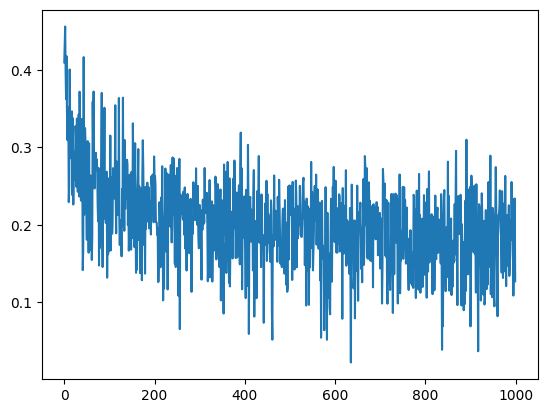

In [379]:
plt.plot(lossi)

In [381]:
emb_outcome = C_outcome[X_train_outcome]
emb_stadium = C_stadium[X_train_stadium]
emb_batter = C_batter[X_train_batter]
emb_bowler = C_bowler[X_train_bowler]
emb_non_striker = C_batter[X_train_non_striker]
emb = torch.cat([emb_outcome, emb_stadium, emb_batter, emb_bowler, emb_non_striker], dim=-1) 
h = torch.tanh(emb.view(-1,block_size*(n_embed_outcome + n_embed_stadium + n_embed_batter + n_embed_bolwer + n_embed_batter)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_train)
loss

tensor(1.5228, grad_fn=<NllLossBackward0>)

In [382]:
emb_outcome = C_outcome[X_val_outcome]
emb_stadium = C_stadium[X_val_stadium]
emb_batter = C_batter[X_val_batter]
emb_bowler = C_bowler[X_val_bowler]
emb_non_striker = C_batter[X_val_non_striker]
emb = torch.cat([emb_outcome, emb_stadium, emb_batter, emb_bowler, emb_non_striker], dim=-1) 
h = torch.tanh(emb.view(-1,block_size*(n_embed_outcome + n_embed_stadium + n_embed_batter + n_embed_bolwer + n_embed_batter)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_val)
loss

tensor(1.5396, grad_fn=<NllLossBackward0>)

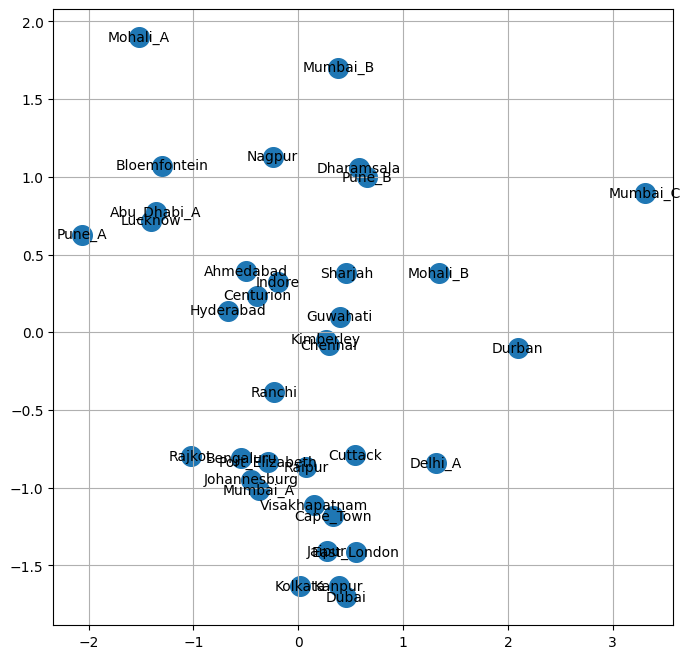

In [310]:
plt.figure(figsize=(8,8))
plt.scatter (C_stadium[:,0].data, C_stadium[:,1].data, s=200)
for i in range (36):
    plt.text(C_stadium[i,0].item(), C_stadium[i,1].item(), itostadium[i], ha="center",va = "center" , color = "black")
plt.grid('minor')